## Dynomometer script

This code runs various dynamometer experiments,


Notes
- Needs pyserial
- venv is racing
- local is Bristol_Racing
- need to close the arduino ide to clear serial port
- com ports will probably need to be redefined for different laptops and plug in config

Todo:


### Experimental setup

The dynamometer test rig will is used to test the motor performance under load

The torque and speed behaviour are logged via an arduino running "Dyno.ino". These values are piped to this script via serial.

The electrical behaviour of the motor and generator are controlled by programmable power supplies. Later experiments will use power electronics to control the motor. Programming the motor power supply ALR3206D looks a bit of a pain, may be easier to just stick arduino current sensor in.

The alternator is powered by TENMA 72-2540 power supply

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import visa
#import pyvisa
from matplotlib import _pylab_helpers
#import tkinter
from tkinter import filedialog
#import threading
#import csv
import pandas as pd
import serial
import time

In [53]:
data=pd.DataFrame();
data

""


In [54]:
# logs the data from arduino
serialcomm = serial.Serial("COM7", 9600, timeout=None)
String2=""
while True:
    String1 =  serialcomm.readline().decode('ascii')
    if String1 != String2:
        ListedString = list(String1.split(" "))
        if len(ListedString)>2:
            ListedString[2]=(ListedString[2])[:-3]
        print(ListedString)
        TimeInstanceData = pd.DataFrame(ListedString)
        TimeInstanceData = TimeInstanceData.transpose()
        #TimeInstanceData.columns=["Time" ,"Current", "Voltage"];
        #TimeInstanceData.columns=["Current", "Voltage"];
        #data=data.append(TimeInstanceData)
        data = pd.concat([data, pd.DataFrame.from_records(TimeInstanceData)])
    #time.sleep(0.5)
    String2=String1

['HX711', 'scale', 'dem']
['766', '0.000', '', '0.000', 'kg\r\n']
['866', '0.000', '', '-0.000', 'kg\r\n']
['966', '0.000', '', '0.000', 'kg\r\n']
['1067', '0.000', '', '0.000', 'kg\r\n']
['1167', '0.000', '', '-0.000', 'kg\r\n']
['1267', '0.000', '', '0.000', 'kg\r\n']
['1367', '0.000', '', '-0.000', 'kg\r\n']
['1467', '0.000', '', '0.000', 'kg\r\n']
['1567', '0.000', '', '-0.000', 'kg\r\n']
['1667', '0.000', '', '-0.000', 'kg\r\n']
['1767', '0.000', '', '-0.000', 'kg\r\n']
['1867', '0.000', '', '-0.000', 'kg\r\n']
['1967', '0.000', '', '0.000', 'kg\r\n']
['2067', '0.000', '', '0.000', 'kg\r\n']
['2167', '0.000', '', '-0.000', 'kg\r\n']
['2267', '0.000', '', '0.000', 'kg\r\n']
['2367', '0.000', '', '-0.000', 'kg\r\n']
['2467', '0.000', '', '0.000', 'kg\r\n']
['2567', '0.000', '', '0.000', 'kg\r\n']
['2667', '0.000', '', '0.000', 'kg\r\n']
['2767', '0.000', '', '0.000', 'kg\r\n']
['2867', '0.000', '', '0.000', 'kg\r\n']
['2967', '0.000', '', '0.000', 'kg\r\n']
['3067', '0.000', '', '0.

KeyboardInterrupt: 

,0,1,2,3,4
0,766.0,0.000,,0.000,kg\r\n
0,866.0,0.000,,-0.000,kg\r\n
0,966.0,0.000,,0.000,kg\r\n
0,1067.0,0.000,,0.000,kg\r\n
0,1167.0,0.000,,-0.000,kg\r\n
...,...,...,...,...,...
0,50168.0,408.041,,0.001,kg\r\n
0,50268.0,408.041,,0.001,kg\r\n
0,50368.0,408.041,,0.001,kg\r\n
0,50468.0,408.041,,0.001,kg\r\n


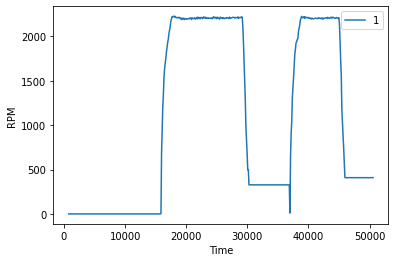

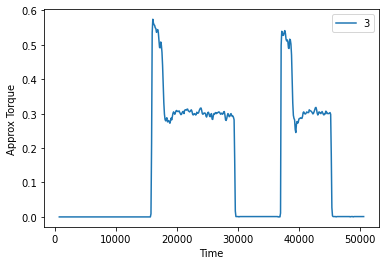

In [55]:
serialcomm.close()
# Drop first row 
# by selecting all rows from first row onwards
data = data.iloc[1: , :];
data[0]=data[0].astype(float);
data[1]=data[1].astype(float);
data[3]=data[3].astype(float);

p1=data.plot(kind = "line", x=0, y=1)
p1.set_xlabel("Time")
p1.set_ylabel("RPM")

p2=data.plot(kind = "line", x=0, y=3)
p2.set_xlabel("Time")
p2.set_ylabel("Approx Torque")
data

In [57]:
Name=input("Name")
Date=input("Day")
data.to_csv(Name+'.csv')

In [12]:
# Tenma code
#writes to tenma setting voltage
AltSerialComm = serial.Serial("COM8", 9600, timeout=None)
AltSerialComm.write("VSET1:10".encode('ascii'))
AltSerialComm.close()

SerialException: could not open port 'COM8': PermissionError(13, 'Access is denied.', None, 5)

In [14]:

AltSerialComm.write("VSET1:1".encode('ascii'))

7